In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    precision_recall_curve, average_precision_score, roc_curve
)


In [2]:
df=pd.read_excel('ecd2.xlsx')

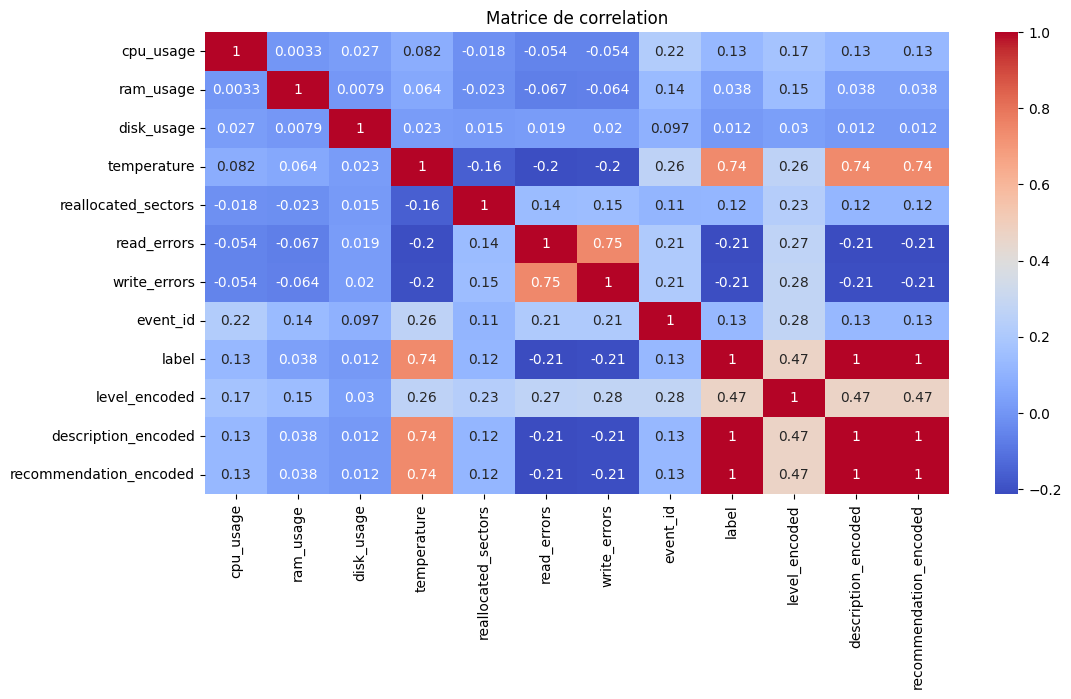

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de correlation")
plt.savefig("correlation.png", dpi=300, bbox_inches="tight")
plt.show()

In [3]:
# Définir les features (X) et la cible (y)
# Définir les features (X) et la cible (y)
X = df[['cpu_usage','ram_usage','disk_usage', 'temperature','read_errors','write_errors','reallocated_sectors', 'event_id']] 
y = df['label']

In [4]:

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 1. Entraînement d'un modèle de régression logistique avec des hyperparamètres par défaut
logreg_default = LogisticRegression(random_state=42, max_iter=1000)  # max_iter augmenté pour la convergence
logreg_default.fit(X_train, y_train)

C:\Users\FANNY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [6]:
# 2. Calcul de l'accuracy sur les ensembles d'entraînement et de test
y_train_pred = logreg_default.predict(X_train)
y_test_pred = logreg_default.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy sur l'entraînement (Régression logistique par défaut) :", train_accuracy)
print("Accuracy sur le test (Régression logistique par défaut) :", test_accuracy)

Accuracy sur l'entraînement (Régression logistique par défaut) : 0.6699583333333333
Accuracy sur le test (Régression logistique par défaut) : 0.6598333333333334


In [9]:
# 3. Ajustement des hyperparamètres avec Random Search
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2', 'elasticnet'],  # Type de régularisation
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithme d'optimisation
    'max_iter': [100, 200, 500, 1000]  # Nombre maximal d'itérations
}

In [11]:
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Nombre de combinaisons à tester
    cv=3,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Utiliser tous les cœurs disponibles
    random_state=42
)
random_search.fit(X_train, y_train)

C:\Users\FANNY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\FANNY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FANNY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\FANNY\AppData\Local\Programs\Python\Python310\lib\site-packages

RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [12]:
# 4. Meilleurs hyperparamètres trouvés par Random Search
best_params_logreg = random_search.best_params_
print("Meilleurs hyperparamètres (Régression logistique Random Search) :", best_params_logreg)


Meilleurs hyperparamètres (Régression logistique Random Search) : {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 10}


In [13]:
# 5. Évaluation du meilleur modèle sur l'ensemble de test
best_model_logreg = random_search.best_estimator_
y_test_pred_logreg = best_model_logreg.predict(X_test)
test_accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
print("Accuracy sur le test (Régression logistique optimisée) :", test_accuracy_logreg)


Accuracy sur le test (Régression logistique optimisée) : 0.731


In [20]:
#Rapport de classification et matrice de confusion
print("\nRapport de classification :")
print(classification_report(y_test, y_test_pred))

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_test_pred))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.26      0.19      0.22       536
           1       0.24      0.29      0.26       508
           2       0.23      0.27      0.25       500
           3       1.00      1.00      1.00       494
           4       1.00      1.00      1.00       494
           5       0.26      0.23      0.24       547
           6       0.98      0.99      0.99       492
           7       1.00      1.00      1.00       488
           8       0.99      1.00      0.99       484
           9       0.68      0.54      0.60       460
          10       0.62      0.64      0.63       500
          11       0.75      0.87      0.81       497

    accuracy                           0.66      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.66      0.66      0.66      6000


Matrice de confusion :
[[101 152 143   0   0 137   2   0   1   0   0   0]
 [ 90 147 149   0   0 121   1

In [14]:
# 6. Matrice de confusion pour la régression logistique
cm_logreg = confusion_matrix(y_test, y_test_pred_logreg)
print("\nMatrice de confusion (Régression logistique) :")
print(cm_logreg)


Matrice de confusion (Régression logistique) :
[[215  33  62   0   0 209   1   0   1   2   0  13]
 [  0 431  65   0   0   0   3   0   0   0   0   9]
 [  2 390  97   0   0   2   4   0   0   0   0   5]
 [  0   0   0 494   0   0   0   0   0   0   0   0]
 [  0   0   0   0 494   0   0   0   0   0   0   0]
 [143 100 146   1   0 147   0   0   2   1   0   7]
 [  0   0   0   0   0   0 492   0   0   0   0   0]
 [  0   0   0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0   0   0 484   0   0   0]
 [  0   0   0   0   0   0   0   0   0 211 182  67]
 [  0   0   0   0   0   0   0   0   0  38 393  69]
 [  4   0   0   0   0   3   2   0   2  27  19 440]]


In [9]:
# 4. Métriques Globales
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("="*50)
print("Métriques Globales".center(50))
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (moyenne pondérée): {precision:.4f}")
print(f"Recall (moyenne pondérée): {recall:.4f}")
print(f"F1-Score (moyenne pondérée): {f1:.4f}")

                Métriques Globales                
Accuracy: 0.6598
Precision (moyenne pondérée): 0.6583
Recall (moyenne pondérée): 0.6598
F1-Score (moyenne pondérée): 0.6573


In [ ]:
# 8. Rapport de classification pour la régression logistique
print("\nRapport de classification (Régression logistique) :")
print(classification_report(y_test, y_test_pred_logreg, target_names=data.target_names))
